In [333]:
# Importing all packeges and functions that will be used in the assignment.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Preprocessing

In [334]:

# Load and show the data
songs = pd.read_csv("../Data/SpotifyFeatures.csv")
# Create variables for samples and features
samples, features = songs.shape
# Print the number of samples, features and the table itself to see if it works properly.
#print(songs)
print(f'There are {samples} samples in the dataset.')
print(f'There are {features} features in the dataset.')

There are 232725 samples in the dataset.
There are 18 features in the dataset.


In [335]:
# Filter the data by genre - Pop and Classical
pop_music = songs[songs['genre'] == 'Pop'].copy()
clas_music = songs[songs['genre'] == 'Classical'].copy()

# Create labels 1 for Pop and 0 for Classical music
pop_music.loc[:, 'label'] = 1
clas_music.loc[:, 'label'] = 0

# Print how many samples(songs) does our data contain
pop_number = pop_music.shape[0]
class_number = clas_music.shape[0]
print(f'There are {pop_number} Pop music songs.')
print(f'There are {class_number} Classical music songs.')

# Extract Liveness and Loudness features for Pop music and then for Classical music
pop_features = pop_music[['liveness', 'loudness']].values
pop_labels = pop_music['label'].values

clas_features = clas_music[['liveness', 'loudness']].values
clas_labels = clas_music['label'].values

# Combine Pop music data with Classical music data
features = np.vstack((pop_features, clas_features))
labels = np.concatenate((pop_labels, clas_labels))

There are 9386 Pop music songs.
There are 9256 Classical music songs.


In [336]:
#Create variable that represents ratio of samples we want to use for training
training = 0.8

#Calculate how many samples will be used for training
training_samples = int(len(features) * training)

#Add shuffling of data for better training

#Create reproducibility, so we will get the same output every time
np.random.seed(32)
#Create an array of indices and shuffle data
indices = np.arange(len(features)) 
np.random.shuffle(indices)    
features_shuffled = features[indices]
labels_shuffled = labels[indices]

#Split the data into training and test sets

#Training should be 80% of all samples.
X_train = features_shuffled[:training_samples]    
y_train = labels_shuffled[:training_samples]      

#Testing should be 20% of all samples.
X_test = features_shuffled[training_samples:]     
y_test = labels_shuffled[training_samples:]   

#We can test it by printing training set and test set.
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Test set has {X_test.shape[0]} samples.")

Training set has 14913 samples.
Test set has 3729 samples.


Alternative way to split the data into two sets is by using "train_test_split".

In [337]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=30)

print(f"Training set has {X_train.shape[0]} samples.")
print(f"Test set has {X_test.shape[0]} samples.")

Training set has 14913 samples.
Test set has 3729 samples.


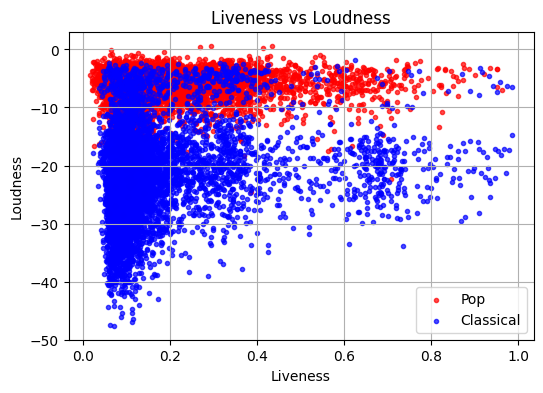

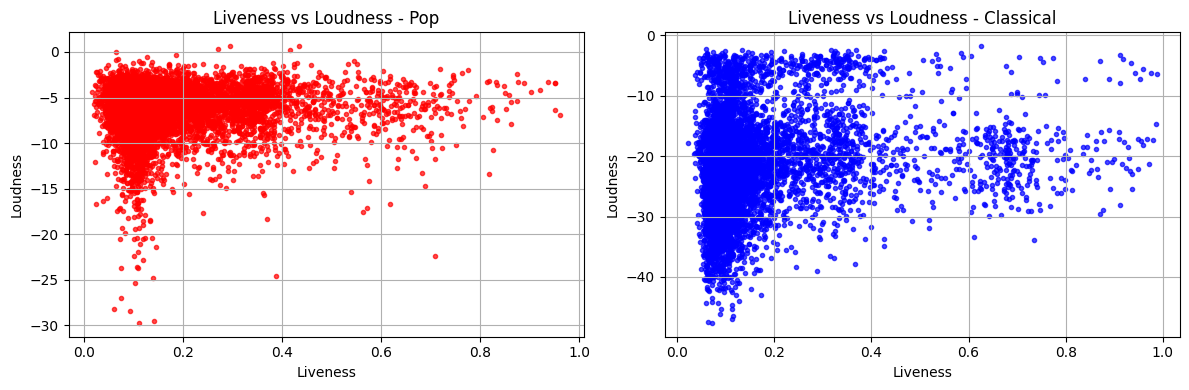

In [338]:
#Make a plot of the "liveness vs loudness" for Pop and Classical songs together
plt.figure(figsize=(6, 4))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Pop', alpha=0.7, marker=".")
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Classical', alpha=0.7, marker=".")
plt.xlabel('Liveness')
plt.ylabel('Loudness')
plt.title('Liveness vs Loudness')
plt.legend()
plt.grid(True)
plt.show()

#Create a subplot for Pop and Classical plots to observe data separately
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

#Plot of Pop songs
ax1.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', alpha=0.7, marker=".")
ax1.set_xlabel('Liveness')
ax1.set_ylabel('Loudness')
ax1.set_title('Liveness vs Loudness - Pop')
ax1.grid(True)

#Plot of Classical songs
ax2.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', alpha=0.7, marker=".")
ax2.set_xlabel('Liveness')
ax2.set_ylabel('Loudness')
ax2.set_title('Liveness vs Loudness - Classical')
ax2.grid(True)

#Adjust the layout
plt.tight_layout()
plt.show()

# Machine Learning

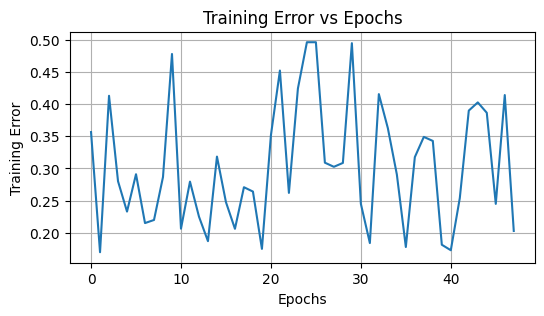

Training Accuracy: 79.74%
Test Accuracy: 79.11%


In [339]:
#Create Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Create Prediction function
def predict(x, weights):
    z = x @ weights
    y_pred = sigmoid(z)
    #Return y_pred by using binary classification
    return (y_pred >= 0.5).astype(int)

#Create Stochastic gradient descent function
def stochastic_gradient_descent(x, y, learning_rate, epochs):
    #Initialize weights randomly
    weights = np.random.randn(x.shape[1])
    #List to store the training error at each epoch
    training_errors = []

    for epoch in range(epochs):
        #Shuffle the training data at the beginning of each epoch
    
        #Create an array of indices
        indices = np.arange(x.shape[0])
        #Shuffle the indices
        np.random.shuffle(indices)
        #Shuffle features (x)
        x = x[indices]
        #Shuffle labels (y)
        y = y[indices]
 
        for i in range(x.shape[0]):
            X = x[i]
            Y = y[i]

            #Predict the probability for the sample

            #Linear combination
            z = X @ weights
            #Apply sigmoid
            y_predicted = sigmoid(z)
            #Calculate the error
            error = y_predicted - Y
            #Update weights based on the gradient of the error
            weights -= learning_rate * X * error
        
        #Compute the error for the entire dataset after each epoch
        y_predict_all = predict(x, weights)
        errors = np.mean(y_predict_all != y)
        training_errors.append(errors)

    return weights, training_errors


#Introduce parameters such as epochs and training rate
training_rate = 0.03
epochs = 48

weights, errors = stochastic_gradient_descent(X_train, y_train, training_rate, epochs)

# Make a plot of training error as a function of epochs
plt.figure(figsize=(6, 3))
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.title('Training Error vs Epochs')
plt.grid()
plt.show()

#Calculate training accuracy
y_train_pred = predict(X_train, weights)
train_accuracy = np.mean(y_train_pred == y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

#Calculate test accuracy
y_test_pred = predict(X_test, weights)
test_accuracy = np.mean(y_test_pred == y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
